# 3.1 Part of Speech (POS) tagging

## Objetivo

- Los alumnæs comprenderán la importancia de las etiquetas *POS* en tareas de NLP
- Implementar un modelo usando HMMs para resolver la tarea
- Entender como se modela un problema SeqToSeq

## ¿Qué son las etiquetas POS?

- Etiquetas que hacen explicita la funcion gramatical de las palabras en una oración
- Determina la función de la palabrea dentro la oración (por ello se le llama Partes del Discurso)
- Se le conoce tambien como Análisis morfosintactico: es el puente entre la estructura de las palabras y la sintaxis
- Permiten el desarrollo de herramientas de NLP más avanzadas

### Categorias comúnes

- Sustantivos - (NOUN)
- Adjetivos - (ADV)
- Verbos - (VERB)

### Ejemplo

> El gato negro camina sobre el tejado

- El - DET
- gato - NOUN
- negro - ADJ
- camina - VERB


### Materia prima de otras tareas de NLP

- Named entity recognition (NER)
- Statistical language models
- Text generation
- Sentient analysis

## Etiquetado automático POS (*POS tagging*)

- El etiquetado POS es una tarea del NLP dónde se le asigna de forma automática una etiqueta según su función a cada palabra tomando en cuenta el contexto de la oración.

- En esta tarea se toma en cuenta cierta estructura de la oración.

- En un enfoque probabilistico queremos obtener: $P(\overrightarrow{x},\overrightarrow{y})$


donde:
- $\overrightarrow{x}$ = $<x_1,x_2,...,x_n>$
- $\overrightarrow{y}$ = $<y_1,y_2,...,y_n>$
- $x_i = palabra$ y $y_i = etiqueta\ POS$

## Un primer acercamiento: Hidden Markov Models (HMM)

$p(\overrightarrow{y}|\overrightarrow{x}) = \displaystyle\prod_{i=1}^{n} p(y_i|y_{i-1}) ⋅ p(x_i|y_i)$

Donde:
- $\overrightarrow{y} = secuencia\ de\ etiquetas\ POS$
- $\overrightarrow{x} = secuencia\ de\ palabras$

## Suposición de Markov

> "The probability of a particular state is dependent only on the previous state"

### Características

- Clasificador secuencial
    - Dada una secuencia de entrada se predice la secuencia de salida más probable
    - Se apreden los parámetros de secuencias previamente etiquetadas

### Componentes del framework HMM

- Estados (etiquetas): $T = t_1,t_2,...,t_n$
- Observaciones (palabras): $W = w_1,w_2,...,w_n$
- Estados iniciales y finales

#### Probabilidades asociadas a estados

- Matriz $A$ con las probabilidades de ir de un estado a otro
- Matriz $B$ con las probabilidades de que una observasión se genera a partir de un estado
- Probabilidades asociadas a los estados iniciales y finales

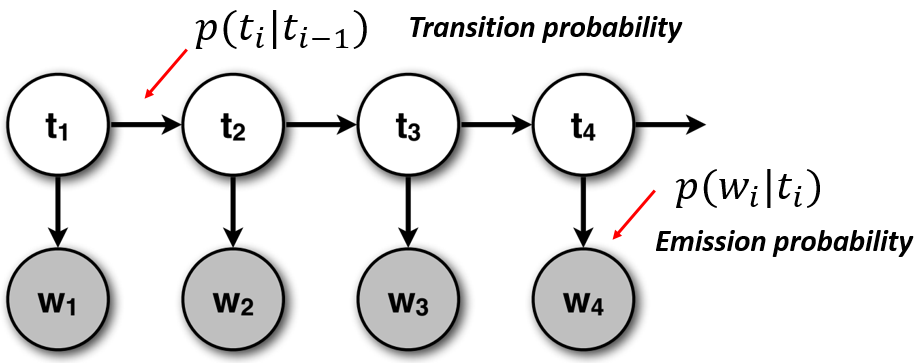

Tomada de https://www.davidsbatista.net/blog/2017/11/11/HHM_and_Naive_Bayes/

### ¿Qué soluciona HMM?

1. Aprender parámetros asociados con una secuencia de observación dada (training step)
    - Dada una lista de palabras y sus etiquetas POS asociadas, el modelo aprende la estructura dada
2. Aplicar un modelo HMM previamente entrenado
    - Dada una nueva oración nunca antes vista, se puede **predecir** la etiqueta POS asociada a cada palabra de dicha oración usando la estructura aprendida

## Implementación

### 0. Instalación de dependencias

In [ ]:
!pip install nltk
!pip install scikit-learn

### 1. Preparación de los datos



In [57]:
import nltk

# Descargando el corpus cess_esp: https://www.nltk.org/book/ch02.html#tab-corpora
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

In [58]:
from nltk.corpus import cess_esp
# Cargando oraciones
corpora = cess_esp.tagged_sents()
corpora[0]

[('El', 'da0ms0'),
 ('grupo', 'ncms000'),
 ('estatal', 'aq0cs0'),
 ('Electricité_de_France', 'np00000'),
 ('-Fpa-', 'Fpa'),
 ('EDF', 'np00000'),
 ('-Fpt-', 'Fpt'),
 ('anunció', 'vmis3s0'),
 ('hoy', 'rg'),
 (',', 'Fc'),
 ('jueves', 'W'),
 (',', 'Fc'),
 ('la', 'da0fs0'),
 ('compra', 'ncfs000'),
 ('del', 'spcms'),
 ('51_por_ciento', 'Zp'),
 ('de', 'sps00'),
 ('la', 'da0fs0'),
 ('empresa', 'ncfs000'),
 ('mexicana', 'aq0fs0'),
 ('Electricidad_Águila_de_Altamira', 'np00000'),
 ('-Fpa-', 'Fpa'),
 ('EAA', 'np00000'),
 ('-Fpt-', 'Fpt'),
 (',', 'Fc'),
 ('creada', 'aq0fsp'),
 ('por', 'sps00'),
 ('el', 'da0ms0'),
 ('japonés', 'aq0ms0'),
 ('Mitsubishi_Corporation', 'np00000'),
 ('para', 'sps00'),
 ('poner_en_marcha', 'vmn0000'),
 ('una', 'di0fs0'),
 ('central', 'ncfs000'),
 ('de', 'sps00'),
 ('gas', 'ncms000'),
 ('de', 'sps00'),
 ('495', 'Z'),
 ('megavatios', 'ncmp000'),
 ('.', 'Fp')]

In [59]:
len(corpora)

6030

In [60]:
import requests

def get_tags_map():
    tags_raw = requests.get("https://gist.githubusercontent.com/vitojph/39c52c709a9aff2d1d24588aba7f8155/raw/af2d83bc4c2a7e2e6dbb01bd0a10a23a3a21a551/universal_tagset-ES.map").text.split("\n")
    tags_map = {line.split("\t")[0].lower(): line.split("\t")[1] for line in tags_raw}
    return tags_map

def map_tag(tag: str, tags_map=get_tags_map()) -> str:
    return tags_map.get(tag.lower(), "N/F")

def parse_tags(corpora: list[list[tuple]]) -> list[list[tuple]]:
    result = []
    for sentence in corpora:
        result.append([(word, map_tag(tag)) for word, tag in sentence])
    return result

In [61]:
corpora = parse_tags(corpora)

[('El', 'DET'),
 ('grupo', 'NOUN'),
 ('estatal', 'ADJ'),
 ('Electricité_de_France', 'NOUN'),
 ('-Fpa-', '.'),
 ('EDF', 'NOUN'),
 ('-Fpt-', '.'),
 ('anunció', 'VERB'),
 ('hoy', 'ADV'),
 (',', '.'),
 ('jueves', 'NOUN'),
 (',', '.'),
 ('la', 'DET'),
 ('compra', 'NOUN'),
 ('del', 'ADP'),
 ('51_por_ciento', 'NUM'),
 ('de', 'ADP'),
 ('la', 'DET'),
 ('empresa', 'NOUN'),
 ('mexicana', 'ADJ'),
 ('Electricidad_Águila_de_Altamira', 'NOUN'),
 ('-Fpa-', '.'),
 ('EAA', 'NOUN'),
 ('-Fpt-', '.'),
 (',', '.'),
 ('creada', 'ADJ'),
 ('por', 'ADP'),
 ('el', 'DET'),
 ('japonés', 'ADJ'),
 ('Mitsubishi_Corporation', 'NOUN'),
 ('para', 'ADP'),
 ('poner_en_marcha', 'VERB'),
 ('una', 'DET'),
 ('central', 'NOUN'),
 ('de', 'ADP'),
 ('gas', 'NOUN'),
 ('de', 'ADP'),
 ('495', 'NUM'),
 ('megavatios', 'NOUN'),
 ('.', '.')]

In [62]:
corpora[-1]

[('Las', 'DET'),
 ('chinelas', 'NOUN'),
 ('de', 'ADP'),
 ('su', 'DET'),
 ('madre', 'NOUN'),
 (',', '.'),
 ('sus', 'DET'),
 ('tobillos', 'NOUN'),
 ('siempre', 'ADV'),
 ('al', 'ADP'),
 ('aire', 'NOUN'),
 ('sobre', 'ADP'),
 ('los', 'DET'),
 ('tacones', 'NOUN'),
 ('que', 'PRON'),
 (',', '.'),
 ('según', 'CONJ'),
 ('*0*', 'ADP'),
 ('afirmaba', 'VERB'),
 ('con', 'ADP'),
 ('convicción', 'NOUN'),
 (',', '.'),
 ('eran', 'VERB'),
 ('indispensables', 'ADJ'),
 ('para', 'ADP'),
 ('parecer', 'VERB'),
 ('arreglada', 'ADJ'),
 (',', '.'),
 ('atractiva', 'ADJ'),
 ('incluso', 'ADV'),
 (',', '.'),
 ('hasta', 'ADV'),
 ('en', 'ADP'),
 ('los', 'DET'),
 ('peores', 'ADJ'),
 ('momentos', 'NOUN'),
 ('de', 'ADP'),
 ('la', 'DET'),
 ('jornada', 'NOUN'),
 ('doméstica', 'ADJ'),
 (',', '.'),
 ('le', 'PRON'),
 ('precedían', 'VERB'),
 ('por', 'ADP'),
 ('la', 'DET'),
 ('estrecha', 'ADJ'),
 ('escalera', 'NOUN'),
 ('de', 'ADP'),
 ('la', 'DET'),
 ('azotea', 'NOUN'),
 (',', '.'),
 ('iluminando', 'VERB'),
 ('para', 'ADP'),
 (

In [63]:
# ¿Cuantas oraciones tenemos disponibles?
len(corpora)

6030

In [64]:
from sklearn.model_selection import train_test_split
# Separando en dos conjuntos, uno para entrenamiento y otro para pruebas
train_data, test_data = train_test_split(corpora, test_size=0.2, random_state=42)

In [65]:
len(train_data), len(test_data)

(4824, 1206)

In [66]:
len(train_data) + len(test_data) == len(corpora)

True

In [67]:
train_data[-1]

[('Meses', 'NOUN'),
 ('antes', 'ADV'),
 ('de', 'ADP'),
 ('su', 'DET'),
 ('expiración', 'NOUN'),
 (',', '.'),
 ('Argentina', 'NOUN'),
 ('denunció', 'VERB'),
 ('el', 'DET'),
 ('acuerdo', 'NOUN'),
 (',', '.'),
 ('que', 'PRON'),
 ('teóricamente', 'ADV'),
 ('tenía', 'VERB'),
 ('como', 'CONJ'),
 ('objetivo', 'NOUN'),
 ('modernizar', 'VERB'),
 ('la', 'DET'),
 ('flota', 'NOUN'),
 ('pesquera', 'ADJ'),
 ('.', '.')]

In [68]:
test_data[-1]

[('-', '.'),
 ('El', 'DET'),
 ('cigarro', 'NOUN'),
 ('crujía', 'VERB'),
 (',', '.'),
 ('*0*', 'ADP'),
 ('estaba', 'VERB'),
 ('reseco', 'ADJ'),
 ('y', 'CONJ'),
 ('deshojado', 'ADJ'),
 (',', '.'),
 ('como', 'ADP'),
 ('si', 'CONJ'),
 ('*0*', 'ADP'),
 ('fuera', 'VERB'),
 ('de', 'ADP'),
 ('papel', 'NOUN'),
 ('.', '.')]

### 2. Entrenamiento

In [69]:
from nltk.tag import hmm

# Creando el modelo HMM usando nltk
trainer = hmm.HiddenMarkovModelTrainer()

# Hora de entrenar
hmm_model = trainer.train(train_data)

### 3. Resultados

In [70]:
tagged_test_data = hmm_model.tag_sents([[word for word, _ in sent] for sent in test_data])

In [71]:
tagged_test_data[0]

[('El', 'DET'),
 ('técnico', 'NOUN'),
 ('barcelonista', 'ADJ'),
 ('ha', 'VERB'),
 ('asegurado', 'VERB'),
 ('que', 'CONJ'),
 ('la', 'DET'),
 ('visita', 'NOUN'),
 ('de', 'ADP'),
 ('Gaspart', 'CONJ'),
 ('ha', 'CONJ'),
 ('contribuido', 'CONJ'),
 ('a', 'CONJ'),
 ('"', 'CONJ'),
 ('sumar', 'CONJ'),
 ('"', 'CONJ'),
 (',', 'CONJ'),
 ('y', 'CONJ'),
 ('*0*', 'CONJ'),
 ('ha', 'CONJ'),
 ('argumentado', 'CONJ'),
 ('que', 'CONJ'),
 ('el', 'CONJ'),
 ('encuentro', 'CONJ'),
 ('con', 'CONJ'),
 ('el', 'CONJ'),
 ('presidente', 'CONJ'),
 ('significa', 'CONJ'),
 ('que', 'CONJ'),
 ('en', 'CONJ'),
 ('el', 'CONJ'),
 ('Barcelona', 'CONJ'),
 ('"', 'CONJ'),
 ('todos', 'CONJ'),
 ('van', 'CONJ'),
 ('en', 'CONJ'),
 ('la', 'CONJ'),
 ('misma', 'CONJ'),
 ('dirección', 'CONJ'),
 ('"', 'CONJ'),
 ('.', 'CONJ')]

In [72]:
# Extrayendo tags verdaderas vs tags predichas
y_true = [tag for sent in test_data for _, tag in sent]
y_pred = [tag for sent in tagged_test_data for _, tag in sent]

In [73]:
y_pred[:10]

['DET', 'NOUN', 'ADJ', 'VERB', 'VERB', 'CONJ', 'DET', 'NOUN', 'ADP', 'CONJ']

In [74]:
y_true[:10]

['DET', 'NOUN', 'ADJ', 'VERB', 'VERB', 'CONJ', 'DET', 'NOUN', 'ADP', 'NOUN']

In [75]:
from collections import defaultdict
label_accuracy_counts = defaultdict(lambda: {"correct": 0, "total": 0})

for gold_tag, predicted_tag in zip(y_true, y_pred):
    label_accuracy_counts[gold_tag]["total"] += 1
    if gold_tag == predicted_tag:
        label_accuracy_counts[gold_tag]["correct"] += 1

# Calculate and display the accuracy for each label
print("Label\tAccuracy")
for label, counts in label_accuracy_counts.items():
    accuracy = counts["correct"] / counts["total"] if counts["total"] > 0 else 0.0
    print(f"{label}\t{accuracy * 100:.2f}%")

Label	Accuracy
DET	33.53%
NOUN	28.25%
ADJ	22.24%
VERB	29.48%
CONJ	97.16%
ADP	29.18%
.	23.67%
PRON	28.39%
ADV	36.18%
NUM	14.25%
X	0.00%


In [76]:
label_accuracy_counts

defaultdict(<function __main__.<lambda>()>,
            {'DET': {'correct': 1865, 'total': 5563},
             'NOUN': {'correct': 2544, 'total': 9005},
             'ADJ': {'correct': 595, 'total': 2675},
             'VERB': {'correct': 1328, 'total': 4505},
             'CONJ': {'correct': 2088, 'total': 2149},
             'ADP': {'correct': 1919, 'total': 6577},
             '.': {'correct': 1141, 'total': 4820},
             'PRON': {'correct': 484, 'total': 1705},
             'ADV': {'correct': 533, 'total': 1473},
             'NUM': {'correct': 57, 'total': 400},
             'X': {'correct': 0, 'total': 4}})

In [78]:
#unseen_sentence = "La casa es grande y luminosa."
unseen_sentence = "La muchacha vio al dinosaurio con el telescopio"

# Tokenizando
tokenized_sentence = nltk.word_tokenize(unseen_sentence)

# Haciendo predicciones
predicted_tags = [tag for word, tag in hmm_model.tag(tokenized_sentence)]

print("Palabra \tPOS Tag (predicha)")
for word, tag in zip(tokenized_sentence, predicted_tags):
    print(f"{word}\t{tag}")

Palabra 	POS Tag (predicha)
La	DET
muchacha	CONJ
vio	CONJ
al	CONJ
dinosaurio	CONJ
con	CONJ
el	CONJ
telescopio	CONJ


### ¿Limitaciones?

- Cada estado depende exclusivamente de su predecesor inmediato
- Cada observación depende exclusivamente del estado actual

## Referencias

- https://www.davidsbatista.net/blog/2017/11/11/HHM_and_Naive_Bayes/ - ⭐